# 🎲 Gaussian Mixture Models - Probabilistic Clustering

**Module 04: Clustering Algorithms (Unsupervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Probabilistic Clustering** - Soft assignments vs hard assignments
2. **Gaussian Distribution** - Multivariate Gaussians and their parameters
3. **Mixture Models** - Combining multiple distributions
4. **Expectation-Maximization (EM) Algorithm** - How GMM learns iteratively
5. **Model Selection** - BIC, AIC for choosing number of components
6. **Covariance Types** - Full, tied, diagonal, spherical
7. **Density Estimation** - Probability density modeling
8. **Anomaly Detection** - Using likelihood scores for outlier detection

## 📚 Section 1: Theoretical Foundation

### What is a Gaussian Mixture Model?

**GMM** is a probabilistic model that assumes data comes from a **mixture of several Gaussian (normal) distributions**, each representing a cluster.

**Key Difference from K-Means:**
```
K-Means (Hard Clustering):
Point X → Cluster 2 (100% membership)

GMM (Soft Clustering):
Point X → Cluster 1 (30% probability)
         → Cluster 2 (65% probability)
         → Cluster 3 (5% probability)

GMM provides uncertainty information!
```

**Visual Concept:**
```
Single Gaussian:              Gaussian Mixture:

     ╱╲                      ╱╲    ╱╲
    ╱  ╲                    ╱  ╲  ╱  ╲
   ╱    ╲                  ╱    ╲╱    ╲
  ╱______╲                ╱____________╲
  
One cluster               Multiple overlapping clusters
```

---

### 📊 Mathematical Foundation

#### 1. **Single Gaussian (Multivariate Normal) Distribution:**
```
For d-dimensional data:

N(x|μ, Σ) = (2π)^(-d/2) |Σ|^(-1/2) exp(-½(x-μ)ᵀΣ⁻¹(x-μ))

Where:
- μ = Mean vector (center of cluster)
- Σ = Covariance matrix (shape/spread of cluster)
- |Σ| = Determinant of covariance matrix
```

**Parameters:**
- **μ (mu)**: Center location (d-dimensional vector)
- **Σ (sigma)**: Covariance matrix (d×d matrix)

#### 2. **Gaussian Mixture Model:**
```
p(x) = Σₖ₌₁ᴷ πₖ N(x|μₖ, Σₖ)

Where:
- K = Number of components (clusters)
- πₖ = Mixing coefficient (weight) for component k
- Σ πₖ = 1 (weights sum to 1)
- 0 ≤ πₖ ≤ 1 (each weight is a probability)
```

**Example with 3 components:**
```
p(x) = 0.3 × N(x|μ₁,Σ₁) + 0.5 × N(x|μ₂,Σ₂) + 0.2 × N(x|μ₃,Σ₃)
       ↑                  ↑                  ↑
    30% weight        50% weight        20% weight
```

---

### 🔄 Expectation-Maximization (EM) Algorithm

GMM learns parameters using **EM**, an iterative algorithm:

**Initialization:**
```
1. Random initialization (or K-Means++)
2. Set initial μₖ, Σₖ, πₖ for each component
```

**Iteration Loop:**
```
E-Step (Expectation):
- Calculate "responsibility" γᵢₖ (soft assignment)
- γᵢₖ = probability that point i belongs to cluster k

γᵢₖ = πₖ N(xᵢ|μₖ,Σₖ) / Σⱼ πⱼ N(xᵢ|μⱼ,Σⱼ)

Example for point i:
- Component 1: γᵢ₁ = 0.75 (75% belongs to cluster 1)
- Component 2: γᵢ₂ = 0.20 (20% belongs to cluster 2)
- Component 3: γᵢ₃ = 0.05 (5% belongs to cluster 3)

M-Step (Maximization):
- Update parameters μₖ, Σₖ, πₖ using responsibilities

πₖ = (Σᵢ γᵢₖ) / N                    (mixing weight)
μₖ = (Σᵢ γᵢₖ xᵢ) / (Σᵢ γᵢₖ)           (weighted mean)
Σₖ = (Σᵢ γᵢₖ (xᵢ-μₖ)(xᵢ-μₖ)ᵀ) / (Σᵢ γᵢₖ)  (weighted covariance)

Convergence Check:
- Stop if log-likelihood change < threshold
- Or max iterations reached
```

**Visual EM Process:**
```
Iteration 0:              Iteration 1:              Iteration 5:
(Random init)             (After 1 E-M step)       (Converged)

  ○ ○ ○                    ○ ○ ○                    ○ ○ ○
 ○ ● ○ ○                  ○ ◉ ○ ○                  ○ ◉ ○ ○
○ ○ ○ ●                  ○ ○ ○ ◉                  ○ ○ ○ ◉
                        Clusters forming          Clusters stable
```

---

### 🎭 Covariance Types

GMM supports different covariance structures (affecting cluster shapes):

#### 1. **Full Covariance** (most flexible)
```
Each cluster has its own covariance matrix:
- Can be elliptical in any orientation
- Most parameters to estimate
- Best fit but risk of overfitting

Σₖ = [σ₁₁  σ₁₂]  (different for each k)
     [σ₂₁  σ₂₂]

Visual: ⬭ ⬮ ⬯ (different ellipses)
```

#### 2. **Tied Covariance**
```
All clusters share same covariance structure:
- Same shape/orientation, different centers
- Fewer parameters

Σ₁ = Σ₂ = Σ₃ = Σ (same for all)

Visual: ⬭ ⬭ ⬭ (same shape ellipses)
```

#### 3. **Diagonal Covariance**
```
No correlation between dimensions:
- Axis-aligned ellipses
- Independent dimensions

Σₖ = [σ₁²   0  ]
     [0    σ₂² ]

Visual: ⬜ ⬜ ⬜ (axis-aligned)
```

#### 4. **Spherical Covariance** (least flexible)
```
Isotropic Gaussians (circular/spherical):
- Equal variance in all dimensions
- Like K-Means with soft assignments

Σₖ = σ²I = [σ²  0 ]
           [0   σ²]

Visual: ⚫ ⚫ ⚫ (circles)
```

**Comparison:**
| **Type** | **Parameters** | **Flexibility** | **Overfitting Risk** | **Use When** |
|----------|---------------|----------------|---------------------|-------------|
| **Full** | K × d² | Highest | High | Have lots of data |
| **Tied** | d² | Medium-High | Medium | Similar shaped clusters |
| **Diagonal** | K × d | Medium | Low | Features independent |
| **Spherical** | K | Lowest | Very Low | Simple, balanced clusters |

---

### 📏 Model Selection: Choosing K (Number of Components)

Unlike K-Means, GMM provides principled ways to select K:

#### 1. **Bayesian Information Criterion (BIC)**
```
BIC = -2 × log(likelihood) + p × log(n)
      ↑                      ↑
   Model fit              Complexity penalty

Where:
- p = number of parameters
- n = number of samples
- Lower BIC = Better model

BIC penalizes complexity more than AIC
```

#### 2. **Akaike Information Criterion (AIC)**
```
AIC = -2 × log(likelihood) + 2p

- Lower AIC = Better model
- Less penalty for complexity than BIC
- May favor more complex models
```

**Comparison:**
```
BIC: More conservative (favors simpler models)
AIC: More flexible (allows more complexity)

Use BIC when: Small dataset, want interpretability
Use AIC when: Large dataset, predictive performance priority
```

#### 3. **Silhouette Score**
```
Can also use clustering metrics:
- Silhouette score (like K-Means)
- But GMM is probabilistic, so less common
```

---

### 🔍 GMM vs K-Means

| **Aspect** | **K-Means** | **Gaussian Mixture Model** |
|------------|------------|---------------------------|
| **Assignment** | Hard (one cluster) | Soft (probabilities) |
| **Cluster Shape** | Spherical only | Elliptical (flexible) |
| **Algorithm** | Alternating optimization | Expectation-Maximization |
| **Probability Model** | No | Yes (density estimation) |
| **Outlier Detection** | No | Yes (low likelihood) |
| **Model Selection** | Elbow, Silhouette | BIC, AIC |
| **Speed** | Faster | Slower |
| **Parameters** | Centroids only | Means + Covariances |
| **Initialization** | K-Means++ | K-Means or random |
| **Convergence** | Always converges | May converge to local optimum |

**Visual Comparison:**
```
K-Means:                    GMM:

  ● ● ●                     ⬭ ⬭ ⬭
 ● ●   ●                   ⬭  ⬭  ⬭
● ● ●   ●                 ⬭ ⬭ ⬭  ⬭

Spherical clusters        Elliptical clusters
Hard boundaries           Soft boundaries
```

---

### 🌟 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| Soft clustering (probabilistic) | Slower than K-Means |
| Flexible cluster shapes (ellipses) | Assumes Gaussian distributions |
| Density estimation | Sensitive to initialization |
| Principled model selection (BIC/AIC) | Can converge to local optimum |
| Handles overlapping clusters well | More parameters to estimate |
| Anomaly detection via likelihood | Requires covariance type selection |
| Uncertainty quantification | Struggles with very imbalanced clusters |
| Works with any covariance structure | May overfit with small data |

---

### 📈 When to Use GMM?

**Use GMM When:**
- Need probabilistic cluster assignments
- Clusters are elliptical (not spherical)
- Want density estimation
- Need anomaly/outlier detection
- Have overlapping clusters
- Want uncertainty quantification
- Data follows Gaussian-like distributions
- Need to generate new samples from clusters

**Use K-Means When:**
- Clusters are roughly spherical
- Need fast results
- Hard assignments sufficient
- Very large datasets
- Don't need probabilities
- Simpler interpretability preferred

**Real-World Applications:**
- **Image Segmentation**: Soft pixel assignments
- **Anomaly Detection**: Low-likelihood samples
- **Speaker Recognition**: Voice pattern modeling
- **Financial Modeling**: Portfolio clustering
- **Bioinformatics**: Gene expression clustering
- **Customer Segmentation**: Fuzzy customer groups

---

### 🎓 Key Concepts Summary

#### Probability Calculations:
```python
# Probability of point belonging to cluster k
responsibility = model.predict_proba(X)

# Log-likelihood (model fit)
log_likelihood = model.score(X)

# Density at point
density = model.score_samples(X)
```

#### Parameters:
```python
# Means (cluster centers)
means = model.means_  # Shape: (n_components, n_features)

# Covariances (cluster shapes)
covariances = model.covariances_  # Shape depends on covariance_type

# Mixing weights
weights = model.weights_  # Shape: (n_components,)
```

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons, load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score, 
    normalized_mutual_info_score, completeness_score
)
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Generate Synthetic Data

In [6]:
# Create synthetic dataset with known structure
np.random.seed(42)

# Generate data with 3 Gaussian clusters
X_blobs, y_blobs = make_blobs(
    n_samples=600,
    n_features=2,
    centers=3,
    cluster_std=[1.0, 1.5, 0.5],  # Different spreads
    random_state=42
)

print("📊 Synthetic Blob Data")
print(f"Shape: {X_blobs.shape}")
print(f"True clusters: 3")

📊 Synthetic Blob Data
Shape: (600, 2)
True clusters: 3


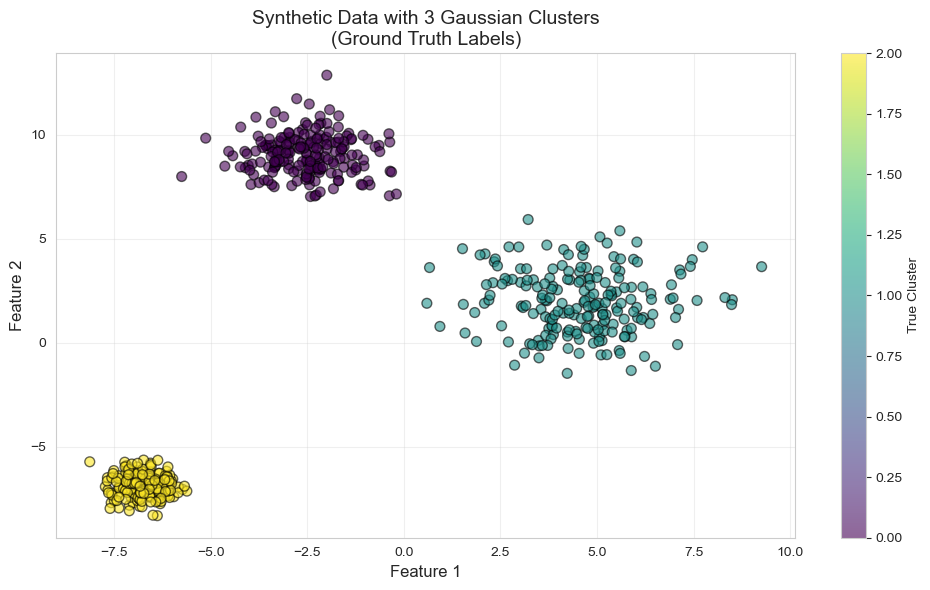

In [9]:
# Visualize synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', 
           alpha=0.6, edgecolors='black', s=50)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Synthetic Data with 3 Gaussian Clusters\n(Ground Truth Labels)', fontsize=14)
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Load Real-World Dataset

In [12]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

print("\n📊 Iris Dataset")
print(f"Shape: {df_iris.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Classes: {iris.target_names.tolist()}")

# Extract features and labels
X_iris = df_iris.drop('target', axis=1).values
y_iris = df_iris['target'].values

print(f"\nClass distribution:")
for i, name in enumerate(iris.target_names):
    print(f"  {name}: {np.sum(y_iris == i)} samples")


📊 Iris Dataset
Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa', 'versicolor', 'virginica']

Class distribution:
  setosa: 50 samples
  versicolor: 50 samples
  virginica: 50 samples


### 2.3 Visualize Iris Data (2D PCA Projection)

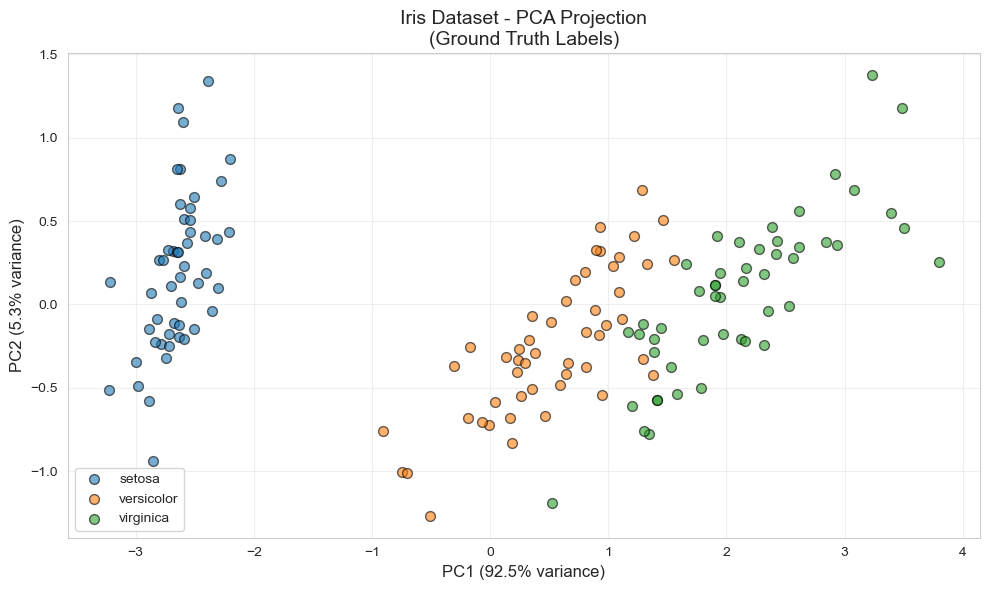

In [15]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_iris_2d = pca.fit_transform(X_iris)

# Visualize
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(iris.target_names):
    mask = y_iris == i
    plt.scatter(X_iris_2d[mask, 0], X_iris_2d[mask, 1],
               label=target_name, alpha=0.6, edgecolors='black', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Iris Dataset - PCA Projection\n(Ground Truth Labels)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🧪 Section 3: Basic Gaussian Mixture Models

### 3.1 Training Basic GMM

In [19]:
# Train GMM with 3 components (known ground truth)
print("\n🔍 Training Gaussian Mixture Model")
print("="*70)

gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
)

gmm.fit(X_blobs)
print("✅ GMM trained successfully!")

# Get predictions and probabilities
y_pred_gmm = gmm.predict(X_blobs)
y_proba_gmm = gmm.predict_proba(X_blobs)

print(f"\n📊 Model Parameters:")
print(f"Number of components: {gmm.n_components}")
print(f"Covariance type: {gmm.covariance_type}")
print(f"Number of iterations: {gmm.n_iter_}")
print(f"Converged: {gmm.converged_}")


🔍 Training Gaussian Mixture Model
✅ GMM trained successfully!

📊 Model Parameters:
Number of components: 3
Covariance type: full
Number of iterations: 2
Converged: True


In [21]:
# Display GMM parameters
print("\n📊 Learned Parameters:")
print("="*70)

print("\nMixing Weights (π):")
for i, weight in enumerate(gmm.weights_):
    print(f"  Component {i}: {weight:.4f} ({weight*100:.1f}%)")

print("\nCluster Means (μ):")
for i, mean in enumerate(gmm.means_):
    print(f"  Component {i}: [{mean[0]:.2f}, {mean[1]:.2f}]")

print("\nCluster Covariances (Σ) - determinants:")
for i, cov in enumerate(gmm.covariances_):
    det = np.linalg.det(cov)
    print(f"  Component {i}: det(Σ) = {det:.2f}")


📊 Learned Parameters:

Mixing Weights (π):
  Component 0: 0.3333 (33.3%)
  Component 1: 0.3333 (33.3%)
  Component 2: 0.3333 (33.3%)

Cluster Means (μ):
  Component 0: [-2.52, 9.05]
  Component 1: [-6.78, -6.85]
  Component 2: [4.57, 1.94]

Cluster Covariances (Σ) - determinants:
  Component 0: det(Σ) = 0.85
  Component 1: det(Σ) = 0.06
  Component 2: det(Σ) = 5.12


### 3.2 Hard vs Soft Clustering

In [24]:
# Compare hard and soft assignments
print("\n🎭 Hard vs Soft Clustering")
print("="*70)

# Select a few sample points
sample_indices = [0, 100, 200, 300, 400]

print("\nSample Point Assignments:")
for idx in sample_indices:
    hard_cluster = y_pred_gmm[idx]
    soft_probs = y_proba_gmm[idx]
    
    print(f"\nPoint {idx}: {X_blobs[idx]}")
    print(f"  Hard assignment: Cluster {hard_cluster}")
    print(f"  Soft assignments:")
    for i, prob in enumerate(soft_probs):
        print(f"    Cluster {i}: {prob:.4f} ({prob*100:.1f}%)")

print("\n💡 Soft clustering provides uncertainty information!")


🎭 Hard vs Soft Clustering

Sample Point Assignments:

Point 0: [3.47919504 0.10618763]
  Hard assignment: Cluster 2
  Soft assignments:
    Cluster 0: 0.0000 (0.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 1.0000 (100.0%)

Point 100: [7.46291558 3.99129975]
  Hard assignment: Cluster 2
  Soft assignments:
    Cluster 0: 0.0000 (0.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 1.0000 (100.0%)

Point 200: [-6.89240423 -6.29374508]
  Hard assignment: Cluster 1
  Soft assignments:
    Cluster 0: 0.0000 (0.0%)
    Cluster 1: 1.0000 (100.0%)
    Cluster 2: 0.0000 (0.0%)

Point 300: [-6.73504287 -5.65245952]
  Hard assignment: Cluster 1
  Soft assignments:
    Cluster 0: 0.0000 (0.0%)
    Cluster 1: 1.0000 (100.0%)
    Cluster 2: 0.0000 (0.0%)

Point 400: [-7.25660949 -7.02044713]
  Hard assignment: Cluster 1
  Soft assignments:
    Cluster 0: 0.0000 (0.0%)
    Cluster 1: 1.0000 (100.0%)
    Cluster 2: 0.0000 (0.0%)

💡 Soft clustering provides uncertainty information!


### 3.3 Visualizing GMM Clusters

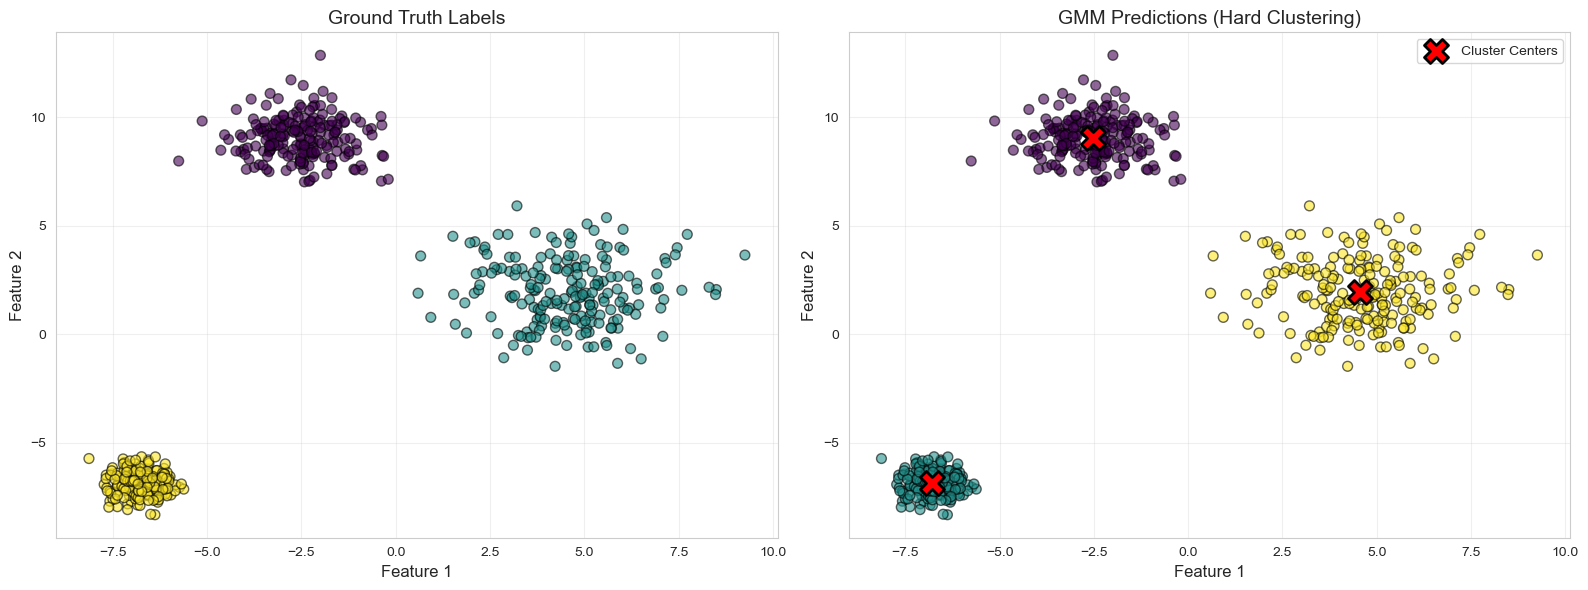

In [27]:
# Visualize hard clustering results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ground truth
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis',
               alpha=0.6, edgecolors='black', s=50)
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('Ground Truth Labels', fontsize=14)
axes[0].grid(True, alpha=0.3)

# GMM predictions
axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_gmm, cmap='viridis',
               alpha=0.6, edgecolors='black', s=50)
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=300, c='red', edgecolors='black',
               linewidths=2, label='Cluster Centers')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('GMM Predictions (Hard Clustering)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Visualizing Gaussian Components

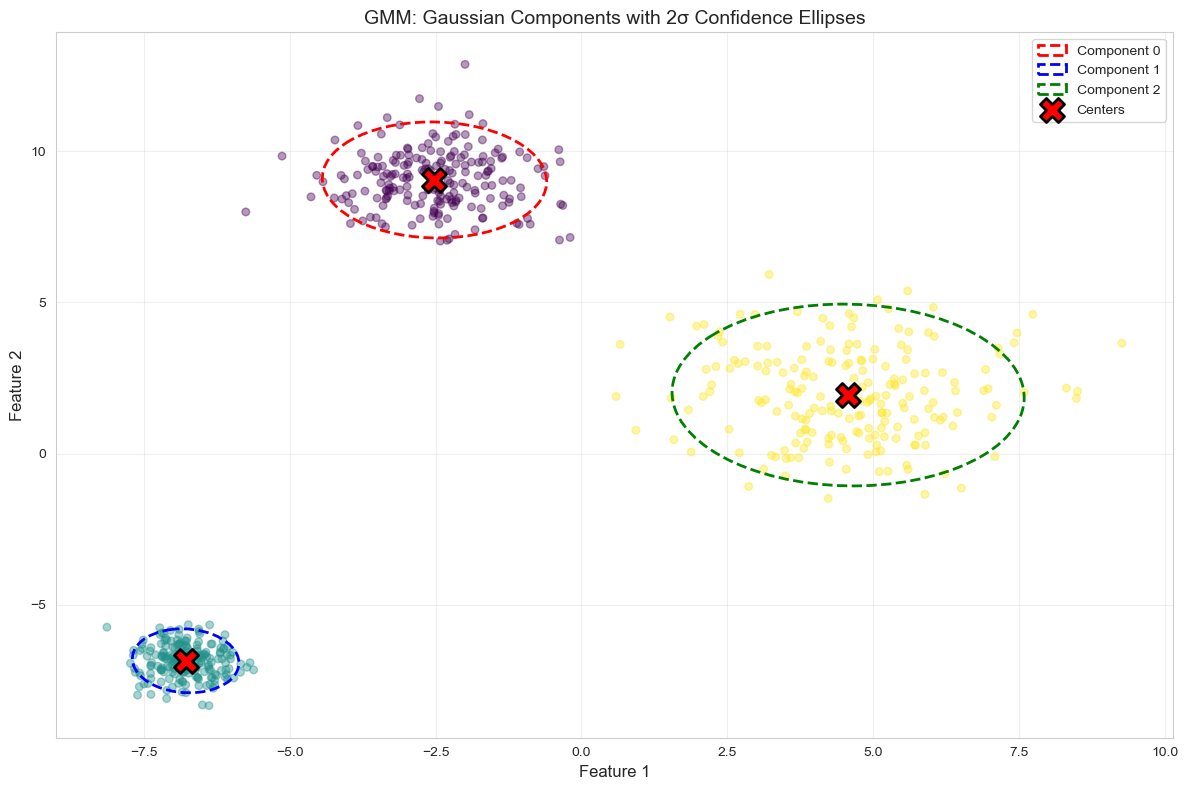


💡 Dashed ellipses show the shape and orientation of each Gaussian component


In [30]:
# Plot Gaussian contours for each component
def plot_gmm_contours(gmm, X, ax, n_std=2):
    """Plot confidence ellipses for GMM components"""
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]
        
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
        
        # Width and height of ellipse
        width, height = 2 * n_std * np.sqrt(eigenvalues)
        
        # Draw ellipse
        from matplotlib.patches import Ellipse
        ellipse = Ellipse(mean, width, height, angle=angle,
                         facecolor='none', edgecolor=colors[i],
                         linewidth=2, linestyle='--',
                         label=f'Component {i}')
        ax.add_patch(ellipse)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_gmm, cmap='viridis',
          alpha=0.4, s=30)

# Add Gaussian contours
plot_gmm_contours(gmm, X_blobs, ax, n_std=2)

# Add centers
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
          marker='X', s=300, c='red', edgecolors='black',
          linewidths=2, label='Centers', zorder=10)

ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_title('GMM: Gaussian Components with 2σ Confidence Ellipses', fontsize=14)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Dashed ellipses show the shape and orientation of each Gaussian component")

### 3.5 Probability Density Visualization

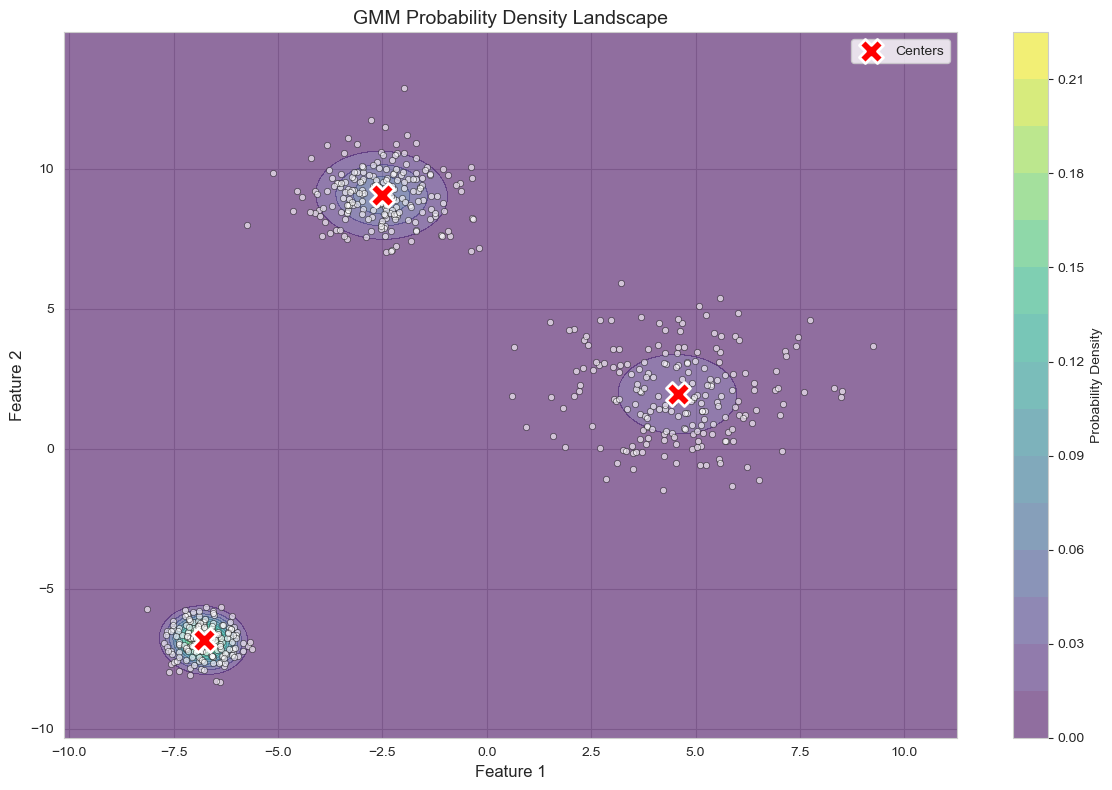


💡 Brighter areas = Higher probability density


In [33]:
# Create density heatmap
x_min, x_max = X_blobs[:, 0].min() - 2, X_blobs[:, 0].max() + 2
y_min, y_max = X_blobs[:, 1].min() - 2, X_blobs[:, 1].max() + 2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Calculate density
Z = np.exp(gmm.score_samples(X_grid))
Z = Z.reshape(xx.shape)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Density heatmap
contour = ax.contourf(xx, yy, Z, levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Probability Density', ax=ax)

# Scatter plot
ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', 
          alpha=0.6, s=20, edgecolors='black', linewidths=0.5)

# Centers
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
          marker='X', s=300, c='red', edgecolors='white',
          linewidths=2, label='Centers')

ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_title('GMM Probability Density Landscape', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

print("\n💡 Brighter areas = Higher probability density")

## 📊 Section 4: Model Selection & Covariance Types

### 4.1 Choosing Number of Components (BIC & AIC)

In [37]:
# Test different numbers of components
print("\n🔍 Model Selection: Finding Optimal K")
print("="*70)

n_components_range = range(1, 11)
bic_scores = []
aic_scores = []
models = []

for n_components in n_components_range:
    gmm_temp = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=42
    )
    gmm_temp.fit(X_blobs)
    
    bic_scores.append(gmm_temp.bic(X_blobs))
    aic_scores.append(gmm_temp.aic(X_blobs))
    models.append(gmm_temp)

# Find optimal k
optimal_k_bic = n_components_range[np.argmin(bic_scores)]
optimal_k_aic = n_components_range[np.argmin(aic_scores)]

print(f"Optimal K (BIC): {optimal_k_bic}")
print(f"Optimal K (AIC): {optimal_k_aic}")
print(f"True K: 3")


🔍 Model Selection: Finding Optimal K
Optimal K (BIC): 3
Optimal K (AIC): 3
True K: 3


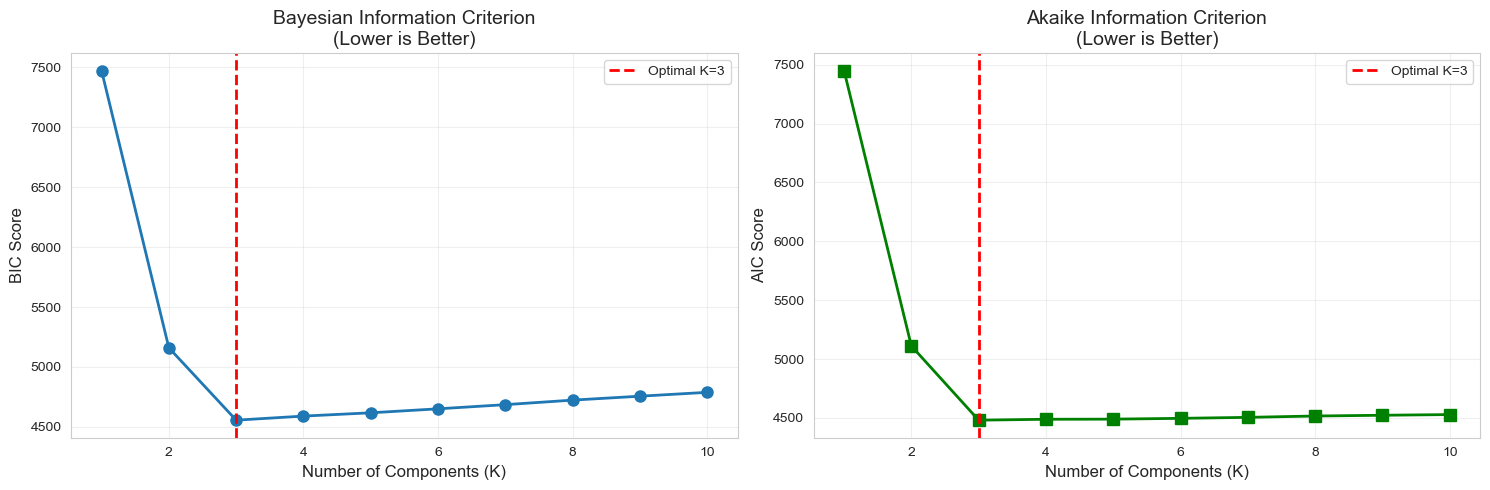


💡 Both BIC and AIC correctly identify K=3!


In [39]:
# Plot BIC and AIC curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# BIC
axes[0].plot(n_components_range, bic_scores, marker='o', linewidth=2, markersize=8)
axes[0].axvline(x=optimal_k_bic, color='red', linestyle='--', 
               label=f'Optimal K={optimal_k_bic}', linewidth=2)
axes[0].set_xlabel('Number of Components (K)', fontsize=12)
axes[0].set_ylabel('BIC Score', fontsize=12)
axes[0].set_title('Bayesian Information Criterion\n(Lower is Better)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# AIC
axes[1].plot(n_components_range, aic_scores, marker='s', linewidth=2, markersize=8, color='green')
axes[1].axvline(x=optimal_k_aic, color='red', linestyle='--',
               label=f'Optimal K={optimal_k_aic}', linewidth=2)
axes[1].set_xlabel('Number of Components (K)', fontsize=12)
axes[1].set_ylabel('AIC Score', fontsize=12)
axes[1].set_title('Akaike Information Criterion\n(Lower is Better)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Both BIC and AIC correctly identify K=3!")

### 4.2 Comparing Covariance Types

In [42]:
# Test different covariance types
print("\n🔍 Comparing Covariance Types")
print("="*70)

covariance_types = ['full', 'tied', 'diag', 'spherical']
cov_results = []

for cov_type in covariance_types:
    gmm_cov = GaussianMixture(
        n_components=3,
        covariance_type=cov_type,
        random_state=42
    )
    gmm_cov.fit(X_blobs)
    
    bic = gmm_cov.bic(X_blobs)
    aic = gmm_cov.aic(X_blobs)
    log_likelihood = gmm_cov.score(X_blobs)  # avg log-likelihood per sample

    # ✅ use the internal method to get the number of parameters
    n_params = gmm_cov._n_parameters()

    cov_results.append({
        'Covariance Type': cov_type,
        'BIC': bic,
        'AIC': aic,
        'Log-Likelihood': log_likelihood,
        'Parameters': n_params
    })
    
    print(f"{cov_type:12} | BIC: {bic:8.2f} | AIC: {aic:8.2f} | Params: {n_params}")

cov_df = pd.DataFrame(cov_results)


🔍 Comparing Covariance Types
full         | BIC:  4556.24 | AIC:  4481.49 | Params: 17
tied         | BIC:  4953.94 | AIC:  4905.58 | Params: 11
diag         | BIC:  4538.28 | AIC:  4476.72 | Params: 14
spherical    | BIC:  4523.45 | AIC:  4475.08 | Params: 11


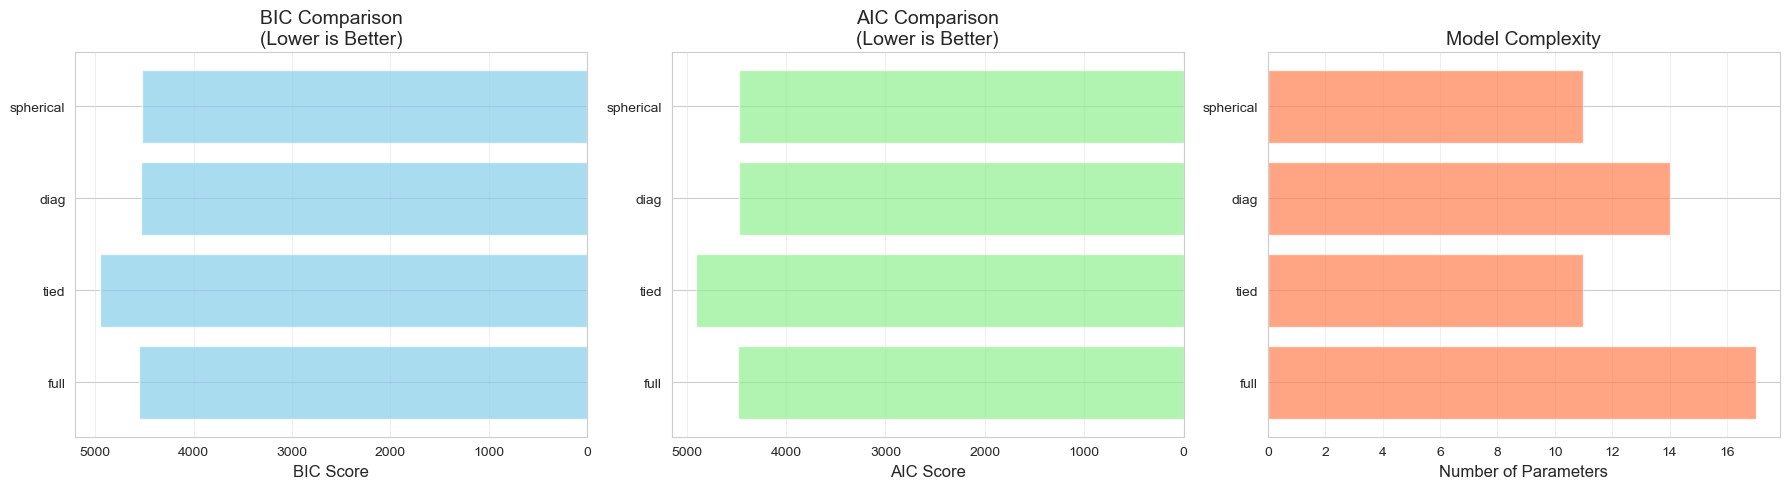


💡 Full covariance fits best but has most parameters
   Trade-off between flexibility and simplicity!


In [44]:
# Visualize covariance type comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BIC
axes[0].barh(cov_df['Covariance Type'], cov_df['BIC'], alpha=0.7, color='skyblue')
axes[0].set_xlabel('BIC Score', fontsize=12)
axes[0].set_title('BIC Comparison\n(Lower is Better)', fontsize=14)
axes[0].invert_xaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# AIC
axes[1].barh(cov_df['Covariance Type'], cov_df['AIC'], alpha=0.7, color='lightgreen')
axes[1].set_xlabel('AIC Score', fontsize=12)
axes[1].set_title('AIC Comparison\n(Lower is Better)', fontsize=14)
axes[1].invert_xaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Parameters
axes[2].barh(cov_df['Covariance Type'], cov_df['Parameters'], alpha=0.7, color='coral')
axes[2].set_xlabel('Number of Parameters', fontsize=12)
axes[2].set_title('Model Complexity', fontsize=14)
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n💡 Full covariance fits best but has most parameters")
print("   Trade-off between flexibility and simplicity!")

### 4.3 Visualizing Different Covariance Types

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

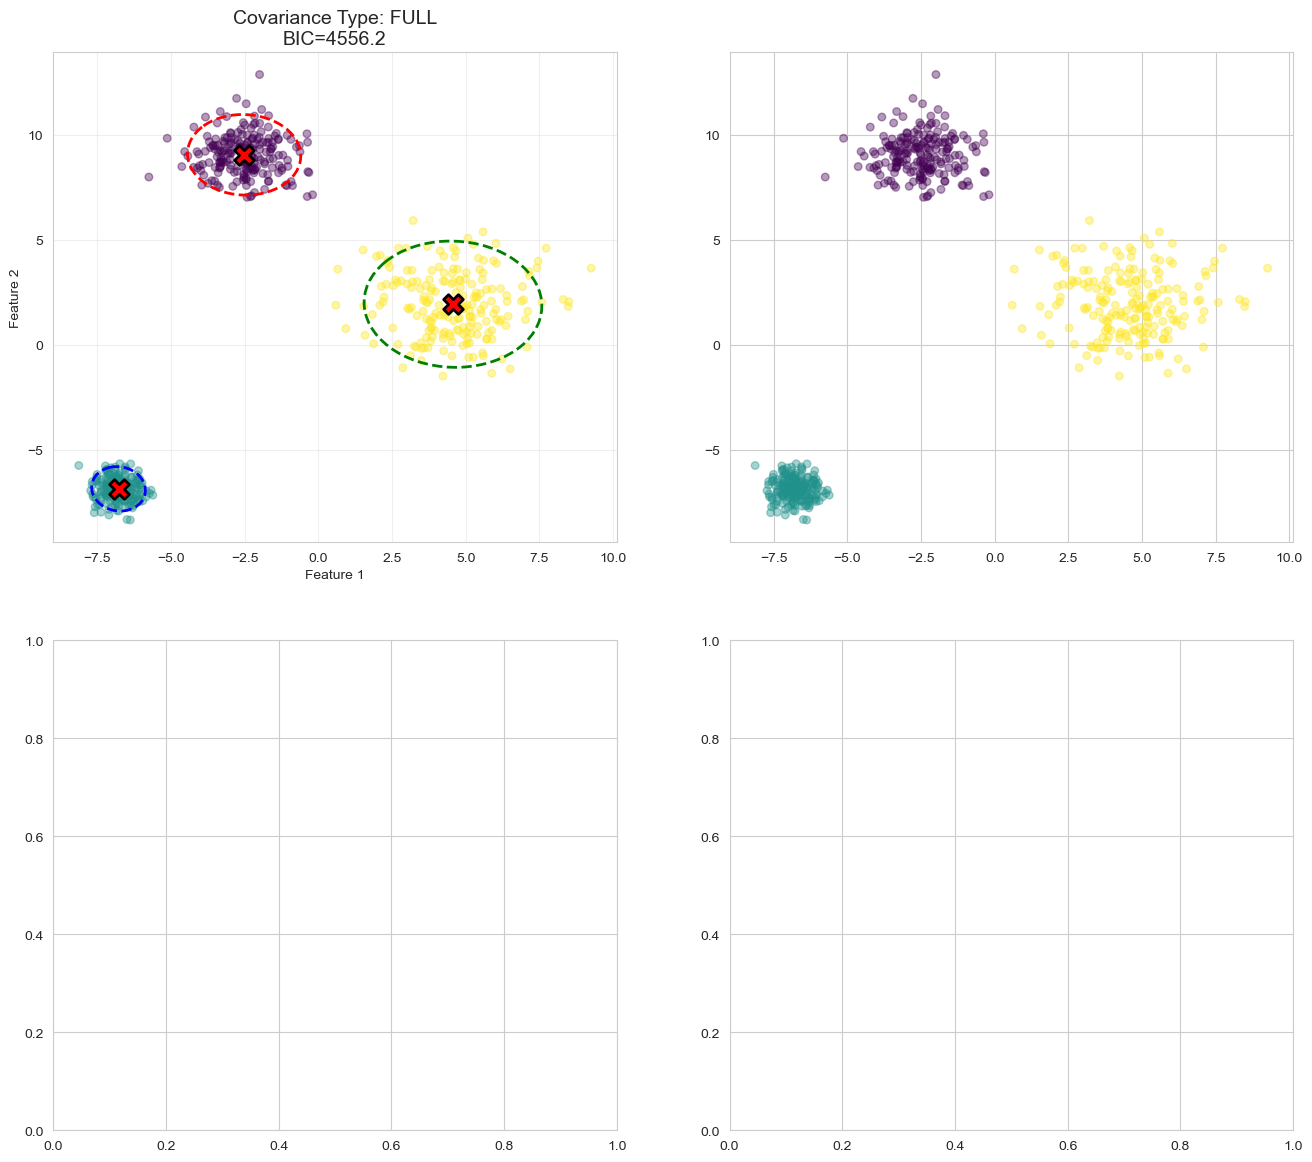

In [47]:
# Compare cluster shapes for different covariance types
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, cov_type in enumerate(covariance_types):
    gmm_temp = GaussianMixture(
        n_components=3,
        covariance_type=cov_type,
        random_state=42
    )
    gmm_temp.fit(X_blobs)
    
    # Predictions
    y_pred_temp = gmm_temp.predict(X_blobs)
    
    # Scatter plot
    axes[idx].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_temp,
                     cmap='viridis', alpha=0.4, s=30)
    
    # Add ellipses
    plot_gmm_contours(gmm_temp, X_blobs, axes[idx], n_std=2)
    
    # Centers
    axes[idx].scatter(gmm_temp.means_[:, 0], gmm_temp.means_[:, 1],
                     marker='X', s=200, c='red', edgecolors='black',
                     linewidths=2, zorder=10)
    
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].set_title(f'Covariance Type: {cov_type.upper()}\nBIC={gmm_temp.bic(X_blobs):.1f}',
                        fontsize=14)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Cluster Shape Differences:")
print("  • Full: Flexible ellipses, any orientation")
print("  • Tied: Same shape, different positions")
print("  • Diagonal: Axis-aligned ellipses")
print("  • Spherical: Circular clusters (like K-Means)")

## 🔍 Section 5: GMM vs K-Means Comparison

### 5.1 Training K-Means for Comparison

In [62]:
# Train K-Means on same data
print("\n🔍 K-Means vs GMM Comparison")
print("="*70)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_kmeans = kmeans.fit_predict(X_blobs)

# Evaluate both methods
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Silhouette scores
sil_gmm = silhouette_score(X_blobs, y_pred_gmm)
sil_kmeans = silhouette_score(X_blobs, y_pred_kmeans)

# Adjusted Rand Index (against ground truth)
ari_gmm = adjusted_rand_score(y_blobs, y_pred_gmm)
ari_kmeans = adjusted_rand_score(y_blobs, y_pred_kmeans)

print("\n📊 Performance Metrics:")
print(f"Silhouette Score:")
print(f"  GMM:     {sil_gmm:.4f}")
print(f"  K-Means: {sil_kmeans:.4f}")
print(f"\nAdjusted Rand Index (vs ground truth):")
print(f"  GMM:     {ari_gmm:.4f}")
print(f"  K-Means: {ari_kmeans:.4f}")


🔍 K-Means vs GMM Comparison

📊 Performance Metrics:
Silhouette Score:
  GMM:     0.8329
  K-Means: 0.8329

Adjusted Rand Index (vs ground truth):
  GMM:     1.0000
  K-Means: 1.0000


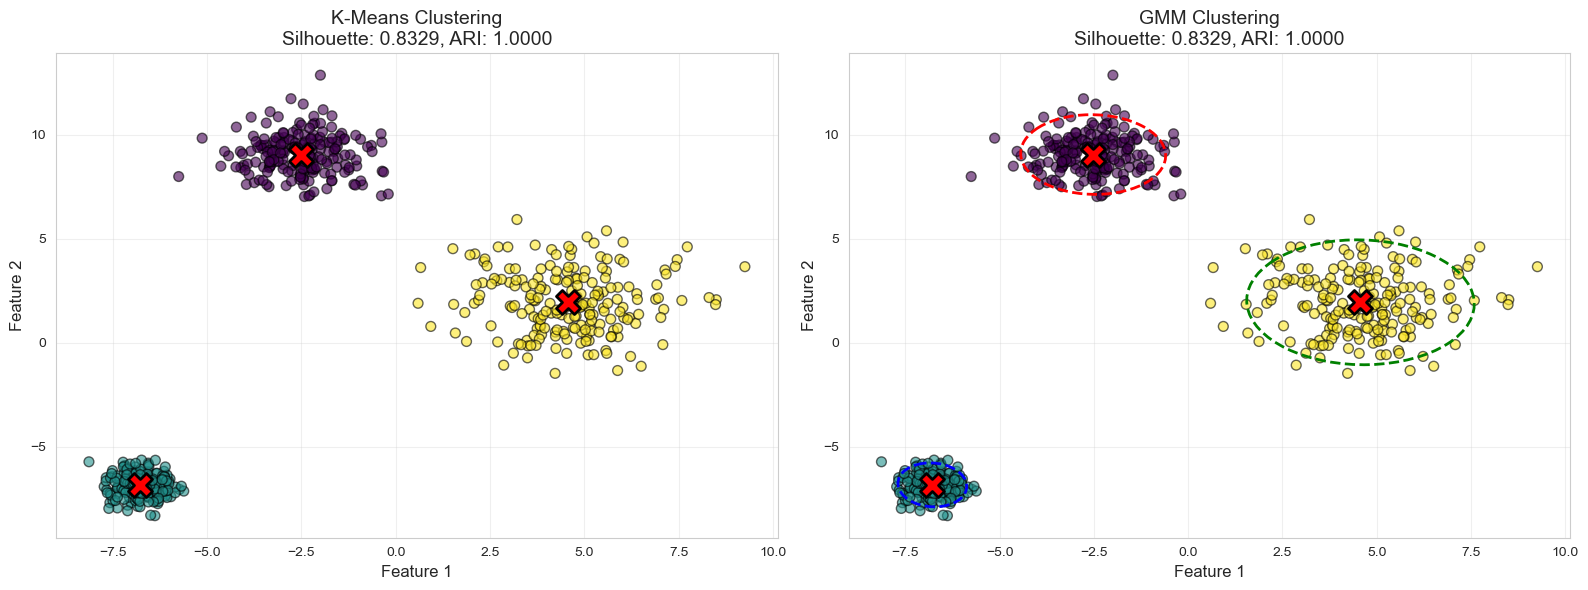

In [64]:
# Side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_kmeans,
               cmap='viridis', alpha=0.6, edgecolors='black', s=50)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title(f'K-Means Clustering\nSilhouette: {sil_kmeans:.4f}, ARI: {ari_kmeans:.4f}',
                 fontsize=14)
axes[0].grid(True, alpha=0.3)

# GMM
axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred_gmm,
               cmap='viridis', alpha=0.6, edgecolors='black', s=50)
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
plot_gmm_contours(gmm, X_blobs, axes[1], n_std=2)
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title(f'GMM Clustering\nSilhouette: {sil_gmm:.4f}, ARI: {ari_gmm:.4f}',
                 fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2 Soft Assignment Advantage

In [68]:
# Demonstrate soft clustering advantage with boundary points
print("\n🎭 Soft Clustering: Points Near Boundaries")
print("="*70)

# Find points with uncertain assignments (probability not dominated)
uncertainty = 1 - y_proba_gmm.max(axis=1)  # High = uncertain
uncertain_indices = np.argsort(uncertainty)[-10:]  # Top 10 most uncertain

print("\nMost Uncertain Points (near cluster boundaries):")
for idx in uncertain_indices[:5]:
    print(f"\nPoint {idx}: {X_blobs[idx]}")
    print(f"  K-Means: Cluster {y_pred_kmeans[idx]} (100% certain)")
    print(f"  GMM probabilities:")
    for i, prob in enumerate(y_proba_gmm[idx]):
        print(f"    Cluster {i}: {prob:.4f} ({prob*100:.1f}%)")


🎭 Soft Clustering: Points Near Boundaries

Most Uncertain Points (near cluster boundaries):

Point 121: [-2.30033403  7.054616  ]
  K-Means: Cluster 0 (100% certain)
  GMM probabilities:
    Cluster 0: 1.0000 (100.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 0.0000 (0.0%)

Point 276: [-1.82293743  7.40157026]
  K-Means: Cluster 0 (100% certain)
  GMM probabilities:
    Cluster 0: 1.0000 (100.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 0.0000 (0.0%)

Point 211: [-1.10640331  7.61243507]
  K-Means: Cluster 0 (100% certain)
  GMM probabilities:
    Cluster 0: 1.0000 (100.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 0.0000 (0.0%)

Point 269: [-0.92318081  7.77647063]
  K-Means: Cluster 0 (100% certain)
  GMM probabilities:
    Cluster 0: 1.0000 (100.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 0.0000 (0.0%)

Point 345: [-1.06792433  7.57842398]
  K-Means: Cluster 0 (100% certain)
  GMM probabilities:
    Cluster 0: 1.0000 (100.0%)
    Cluster 1: 0.0000 (0.0%)
    Cluster 2: 0

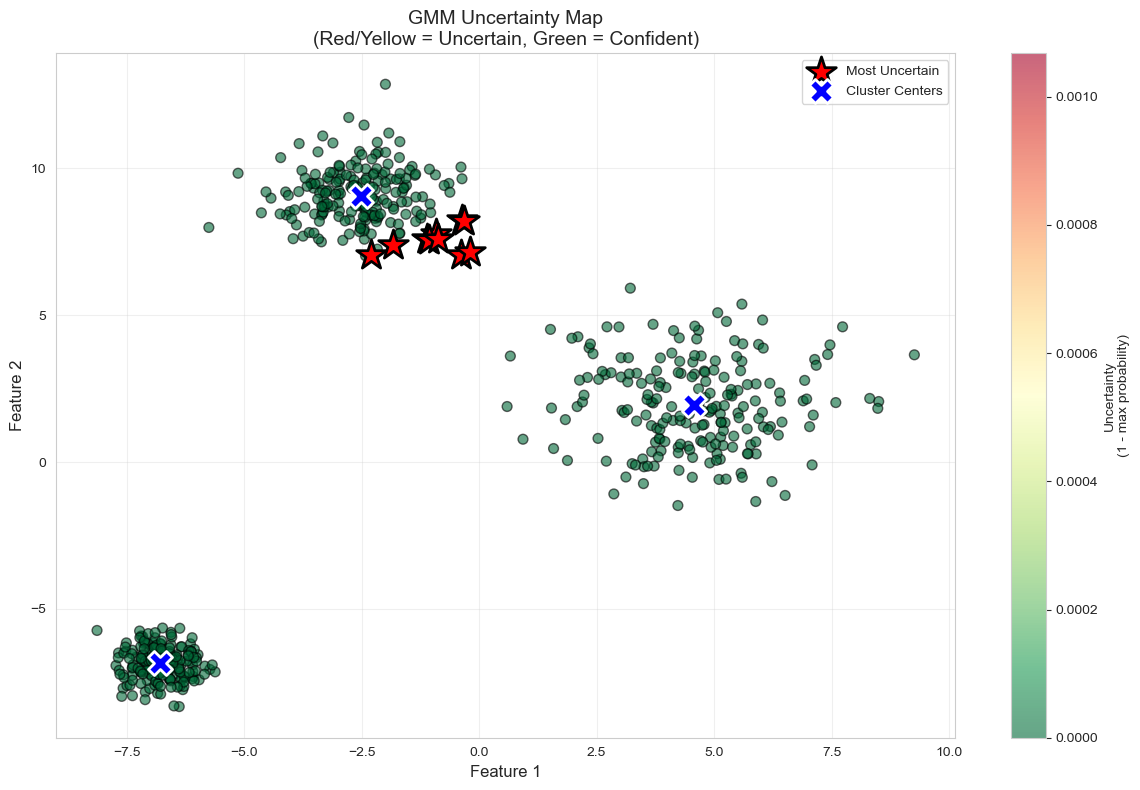


💡 GMM quantifies uncertainty - valuable for decision-making!


In [70]:
# Visualize uncertainty
plt.figure(figsize=(12, 8))

# Color by uncertainty
scatter = plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=uncertainty,
                     cmap='RdYlGn_r', alpha=0.6, s=50, edgecolors='black')
plt.colorbar(scatter, label='Uncertainty\n(1 - max probability)')

# Highlight most uncertain points
plt.scatter(X_blobs[uncertain_indices, 0], X_blobs[uncertain_indices, 1],
           marker='*', s=500, c='red', edgecolors='black', linewidths=2,
           label='Most Uncertain')

# Add cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
           marker='X', s=300, c='blue', edgecolors='white', linewidths=2,
           label='Cluster Centers')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('GMM Uncertainty Map\n(Red/Yellow = Uncertain, Green = Confident)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 GMM quantifies uncertainty - valuable for decision-making!")

## 🎯 Section 6: Advanced Applications

### 6.1 Anomaly Detection with GMM

In [74]:
# Use GMM for anomaly detection
print("\n🔍 Anomaly Detection Using GMM")
print("="*70)

# Calculate log-likelihood for each point
log_likelihood = gmm.score_samples(X_blobs)

# Lower log-likelihood = more anomalous
threshold = np.percentile(log_likelihood, 5)  # Bottom 5%
anomalies = log_likelihood < threshold

print(f"Threshold (5th percentile): {threshold:.4f}")
print(f"Number of anomalies detected: {anomalies.sum()}")


🔍 Anomaly Detection Using GMM
Threshold (5th percentile): -6.0296
Number of anomalies detected: 30


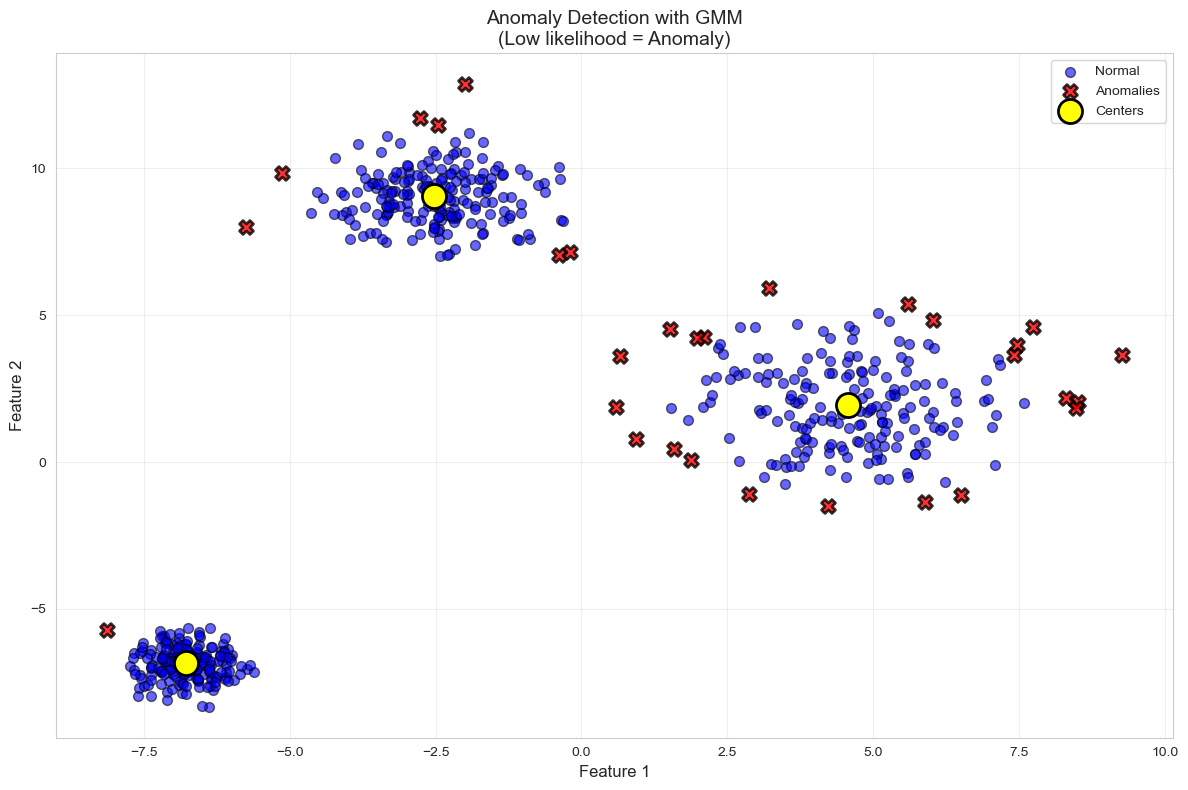


💡 Points far from all clusters have low likelihood → Anomalies!


In [76]:
# Visualize anomalies
plt.figure(figsize=(12, 8))

# Normal points
plt.scatter(X_blobs[~anomalies, 0], X_blobs[~anomalies, 1],
           c='blue', alpha=0.6, s=50, edgecolors='black', label='Normal')

# Anomalies
plt.scatter(X_blobs[anomalies, 0], X_blobs[anomalies, 1],
           c='red', alpha=0.8, s=100, edgecolors='black', linewidths=2,
           marker='X', label='Anomalies')

# Cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
           marker='o', s=300, c='yellow', edgecolors='black', linewidths=2,
           label='Centers')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Anomaly Detection with GMM\n(Low likelihood = Anomaly)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Points far from all clusters have low likelihood → Anomalies!")

### 6.2 Density Estimation

In [79]:
# Demonstrate density estimation
print("\n📊 Density Estimation with GMM")
print("="*70)

# Generate grid for density estimation
x_min, x_max = X_blobs[:, 0].min() - 3, X_blobs[:, 0].max() + 3
y_min, y_max = X_blobs[:, 1].min() - 3, X_blobs[:, 1].max() + 3

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Calculate log-likelihood
Z_log = gmm.score_samples(X_grid)
Z = np.exp(Z_log).reshape(xx.shape)


📊 Density Estimation with GMM


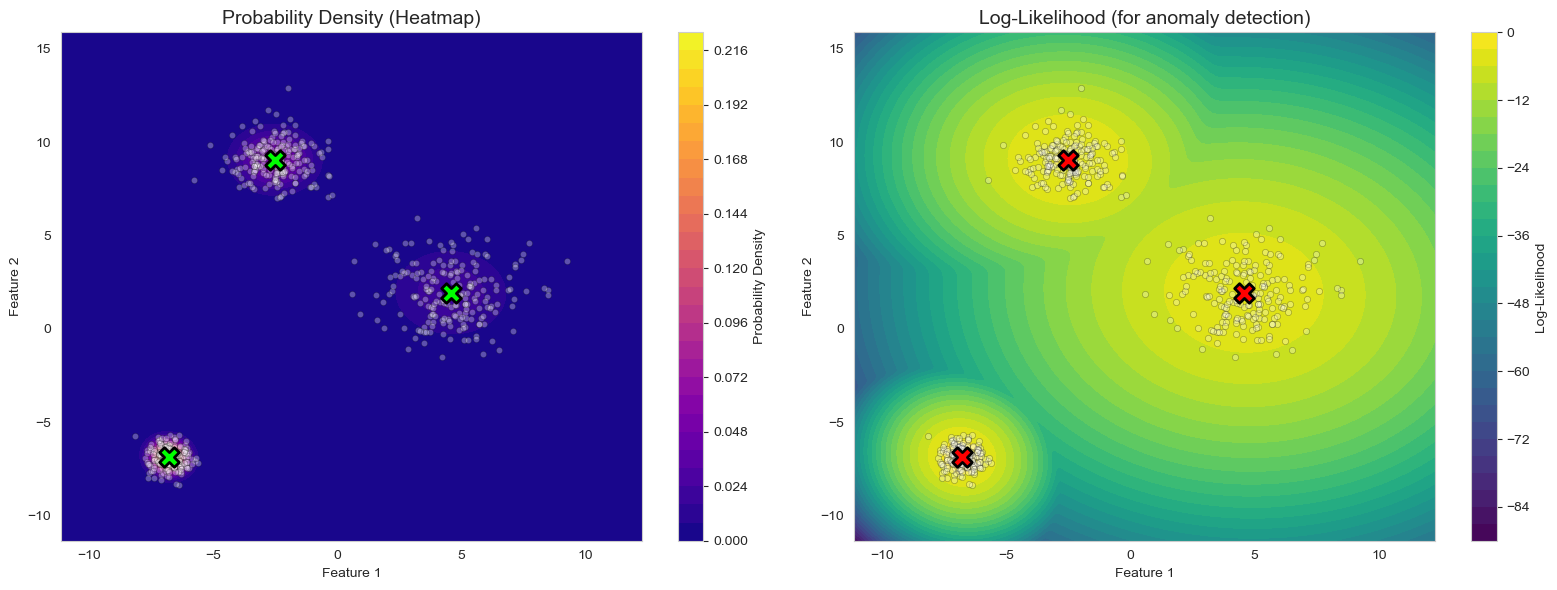


💡 GMM learns the full probability distribution of data!


In [81]:
# Visualize density with contours
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Density heatmap
im = axes[0].contourf(xx, yy, Z, levels=30, cmap='plasma')
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c='white', 
               alpha=0.3, s=20, edgecolors='black', linewidths=0.5)
axes[0].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=200, c='lime', edgecolors='black', linewidths=2)
plt.colorbar(im, ax=axes[0], label='Probability Density')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Probability Density (Heatmap)', fontsize=14)

# Log-likelihood
Z_log_plot = Z_log.reshape(xx.shape)
im2 = axes[1].contourf(xx, yy, Z_log_plot, levels=30, cmap='viridis')
axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c='white',
               alpha=0.3, s=20, edgecolors='black', linewidths=0.5)
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=200, c='red', edgecolors='black', linewidths=2)
plt.colorbar(im2, ax=axes[1], label='Log-Likelihood')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Log-Likelihood (for anomaly detection)', fontsize=14)

plt.tight_layout()
plt.show()

print("\n💡 GMM learns the full probability distribution of data!")

### 6.3 Generating New Samples

In [84]:
# Generate new samples from learned distribution
print("\n🎲 Generating New Samples from GMM")
print("="*70)

# Generate 200 new samples
X_new, y_new = gmm.sample(n_samples=200)

print(f"Generated {X_new.shape[0]} new samples")
print(f"Sample means: {X_new.mean(axis=0)}")
print(f"Original means: {X_blobs.mean(axis=0)}")


🎲 Generating New Samples from GMM
Generated 200 new samples
Sample means: [-1.67272301  1.15143523]
Original means: [-1.57657556  1.38048022]


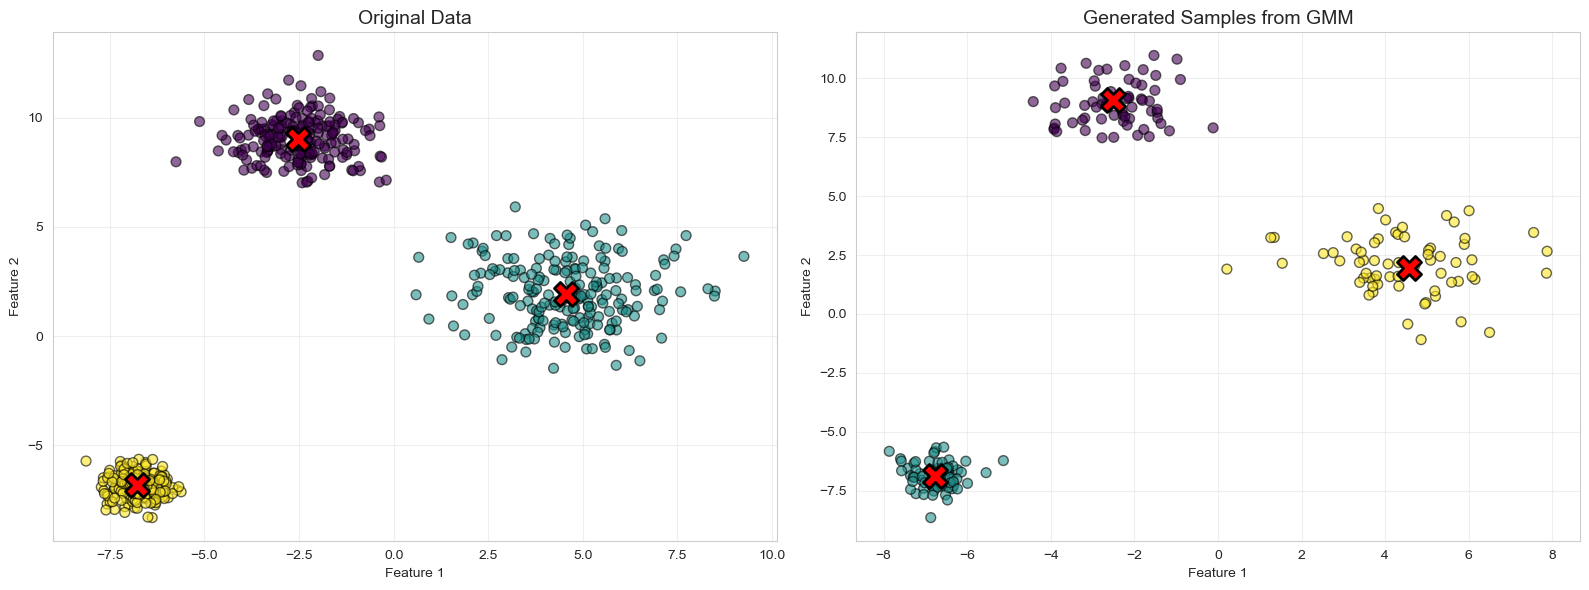


💡 Generated samples follow the learned distribution!
   Useful for data augmentation and synthetic data generation.


In [87]:
# Visualize original vs generated data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original data
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis',
               alpha=0.6, s=50, edgecolors='black')
axes[0].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Original Data', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Generated data
axes[1].scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='viridis',
               alpha=0.6, s=50, edgecolors='black')
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Generated Samples from GMM', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Generated samples follow the learned distribution!")
print("   Useful for data augmentation and synthetic data generation.")

### 6.4 Real-World Application: Iris Clustering

In [91]:
# Apply GMM to Iris dataset
print("\n🌸 GMM on Iris Dataset")
print("="*70)

# Find optimal number of components
n_components_range = range(2, 8)
bic_iris = []
aic_iris = []

for n in n_components_range:
    gmm_temp = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm_temp.fit(X_iris)
    bic_iris.append(gmm_temp.bic(X_iris))
    aic_iris.append(gmm_temp.aic(X_iris))

optimal_k_iris = n_components_range[np.argmin(bic_iris)]
print(f"Optimal K (BIC): {optimal_k_iris}")
print(f"True K: 3")


🌸 GMM on Iris Dataset
Optimal K (BIC): 2
True K: 3


In [94]:
# Train GMM with optimal K
gmm_iris = GaussianMixture(n_components=optimal_k_iris, covariance_type='full', random_state=42)
gmm_iris.fit(X_iris)

y_pred_iris = gmm_iris.predict(X_iris)

# Evaluate
ari_iris = adjusted_rand_score(y_iris, y_pred_iris)
nmi_iris = normalized_mutual_info_score(y_iris, y_pred_iris)
completeness_iris = completeness_score(y_iris, y_pred_iris)

print(f"\n📊 Iris Clustering Performance:")
print(f"Adjusted Rand Index: {ari_iris:.4f}")
print(f"Normalized Mutual Info: {nmi_iris:.4f}")
print(f"Completeness Score: {completeness_iris:.4f}")


📊 Iris Clustering Performance:
Adjusted Rand Index: 0.5681
Normalized Mutual Info: 0.7337
Completeness Score: 1.0000


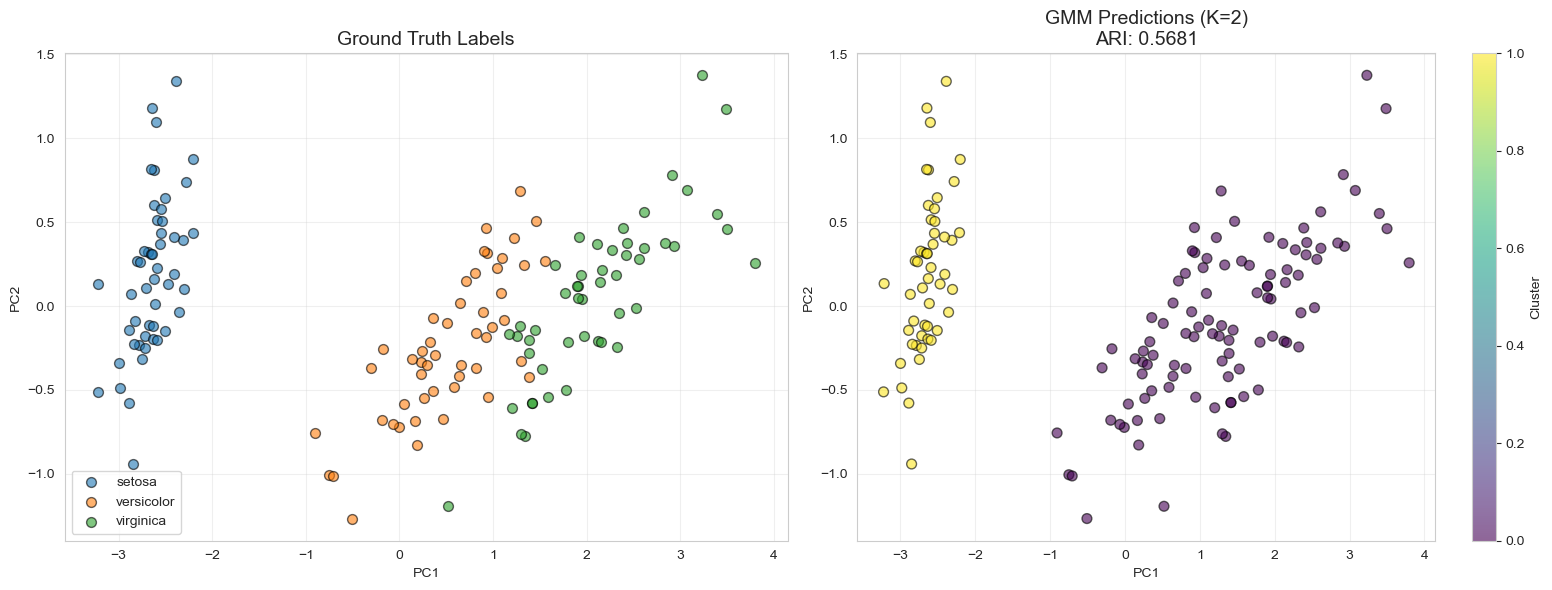

In [97]:
# Visualize Iris clustering (PCA projection)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ground truth
for i, target_name in enumerate(iris.target_names):
    mask = y_iris == i
    axes[0].scatter(X_iris_2d[mask, 0], X_iris_2d[mask, 1],
                   label=target_name, alpha=0.6, s=50, edgecolors='black')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Ground Truth Labels', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# GMM predictions
scatter = axes[1].scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_pred_iris,
                         cmap='viridis', alpha=0.6, s=50, edgecolors='black')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title(f'GMM Predictions (K={optimal_k_iris})\nARI: {ari_iris:.4f}', fontsize=14)
plt.colorbar(scatter, ax=axes[1], label='Cluster')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.5 Handling Overlapping Clusters

In [100]:
# Create overlapping clusters dataset
print("\n🔄 GMM on Overlapping Clusters")
print("="*70)

# Generate overlapping data
np.random.seed(42)
X_overlap, y_overlap = make_blobs(
    n_samples=600,
    n_features=2,
    centers=3,
    cluster_std=[1.5, 1.5, 1.5],  # Large overlap
    center_box=(-5, 5),
    random_state=42
)

# Train GMM and K-Means
gmm_overlap = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_overlap.fit(X_overlap)
y_pred_gmm_overlap = gmm_overlap.predict(X_overlap)

kmeans_overlap = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred_kmeans_overlap = kmeans_overlap.fit_predict(X_overlap)


🔄 GMM on Overlapping Clusters


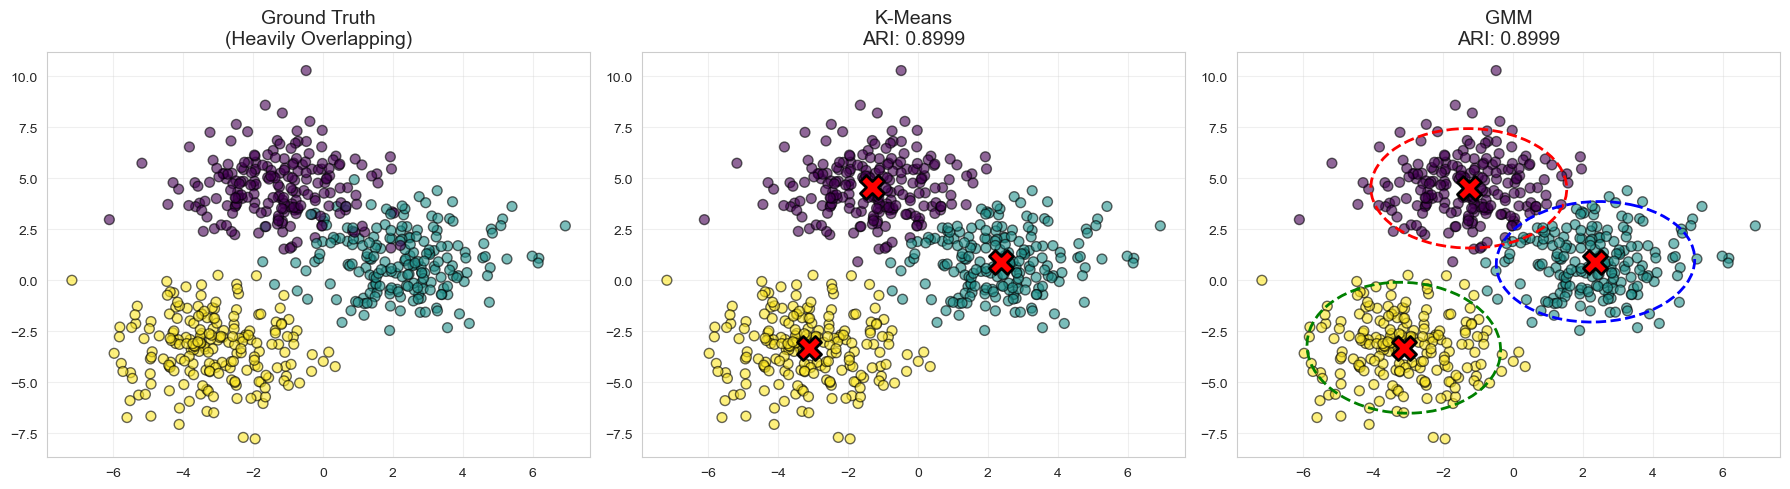


💡 GMM handles overlapping clusters better due to soft assignments!


In [102]:
# Compare on overlapping data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ground truth
axes[0].scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_overlap,
               cmap='viridis', alpha=0.6, s=50, edgecolors='black')
axes[0].set_title('Ground Truth\n(Heavily Overlapping)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# K-Means
axes[1].scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_pred_kmeans_overlap,
               cmap='viridis', alpha=0.6, s=50, edgecolors='black')
axes[1].scatter(kmeans_overlap.cluster_centers_[:, 0], 
               kmeans_overlap.cluster_centers_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
ari_kmeans_overlap = adjusted_rand_score(y_overlap, y_pred_kmeans_overlap)
axes[1].set_title(f'K-Means\nARI: {ari_kmeans_overlap:.4f}', fontsize=14)
axes[1].grid(True, alpha=0.3)

# GMM
axes[2].scatter(X_overlap[:, 0], X_overlap[:, 1], c=y_pred_gmm_overlap,
               cmap='viridis', alpha=0.6, s=50, edgecolors='black')
plot_gmm_contours(gmm_overlap, X_overlap, axes[2], n_std=2)
axes[2].scatter(gmm_overlap.means_[:, 0], gmm_overlap.means_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2)
ari_gmm_overlap = adjusted_rand_score(y_overlap, y_pred_gmm_overlap)
axes[2].set_title(f'GMM\nARI: {ari_gmm_overlap:.4f}', fontsize=14)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 GMM handles overlapping clusters better due to soft assignments!")

## 🚀 Section 7: Production Best Practices

### 7.1 Model Saving and Loading

In [106]:
import joblib

# Save GMM model
print("\n💾 Saving GMM Model")
print("="*70)

joblib.dump(gmm, 'gmm_model.pkl')
print("✅ Model saved as 'gmm_model.pkl'")

# Load model
loaded_gmm = joblib.load('gmm_model.pkl')

# Test prediction
test_sample = X_blobs[:3]
predictions = loaded_gmm.predict(test_sample)
probabilities = loaded_gmm.predict_proba(test_sample)

print("\n🧪 Testing Loaded Model:")
print(f"Predictions: {predictions}")
print(f"\nProbabilities:\n{probabilities}")
print("\n✅ Model loaded and working correctly!")


💾 Saving GMM Model
✅ Model saved as 'gmm_model.pkl'

🧪 Testing Loaded Model:
Predictions: [2 1 2]

Probabilities:
[[1.55920635e-026 5.14302261e-156 1.00000000e+000]
 [3.60266810e-065 1.00000000e+000 1.19291988e-021]
 [5.80684359e-028 7.69772172e-303 1.00000000e+000]]

✅ Model loaded and working correctly!


### 7.2 Production Pipeline

In [109]:
from sklearn.pipeline import Pipeline

# Create production pipeline with preprocessing
production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=3, covariance_type='full', random_state=42))
])

# Train pipeline
print("\n🚀 Creating Production Pipeline")
print("="*70)
production_pipeline.fit(X_blobs)

# Evaluate
y_pred_pipeline = production_pipeline.predict(X_blobs)
ari_pipeline = adjusted_rand_score(y_blobs, y_pred_pipeline)

print(f"Pipeline ARI: {ari_pipeline:.4f}")

# Save pipeline
joblib.dump(production_pipeline, 'gmm_production_pipeline.pkl')
print("\n💾 Production pipeline saved!")


🚀 Creating Production Pipeline
Pipeline ARI: 1.0000

💾 Production pipeline saved!


### 7.3 Production Checklist

In [112]:
print("\n" + "="*80)
print("✅ GMM PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ Number of components selected (BIC/AIC)",
    "✓ Covariance type chosen based on data structure",
    "✓ Model convergence verified",
    "✓ Compared with K-Means baseline",
    "✓ Soft assignments analyzed for uncertainty",
    "✓ Anomaly detection threshold determined",
    "✓ Density estimation validated",
    "✓ Sample generation tested (if needed)",
    "✓ Performance metrics calculated (ARI, NMI, Silhouette)",
    "✓ Cluster visualization created",
    "✓ Gaussian ellipses plotted for interpretation",
    "✓ Log-likelihood distribution examined",
    "✓ Handling of overlapping clusters validated",
    "✓ Model saved in production format",
    "✓ Production pipeline created with preprocessing",
    "✓ Loaded model tested for correctness",
    "✓ Documentation of optimal hyperparameters"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)


✅ GMM PRODUCTION CHECKLIST
  ✓ Number of components selected (BIC/AIC)
  ✓ Covariance type chosen based on data structure
  ✓ Model convergence verified
  ✓ Compared with K-Means baseline
  ✓ Soft assignments analyzed for uncertainty
  ✓ Anomaly detection threshold determined
  ✓ Density estimation validated
  ✓ Sample generation tested (if needed)
  ✓ Performance metrics calculated (ARI, NMI, Silhouette)
  ✓ Cluster visualization created
  ✓ Gaussian ellipses plotted for interpretation
  ✓ Log-likelihood distribution examined
  ✓ Handling of overlapping clusters validated
  ✓ Model saved in production format
  ✓ Production pipeline created with preprocessing
  ✓ Loaded model tested for correctness
  ✓ Documentation of optimal hyperparameters



### 7.4 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **GMM is probabilistic clustering** - Provides soft assignments with uncertainties
2. **Mixture of Gaussians** - Data modeled as combination of multiple Gaussian distributions
3. **EM Algorithm** - Iteratively optimizes parameters (E-step: responsibilities, M-step: update parameters)
4. **Covariance types** - Full, tied, diagonal, spherical (flexibility vs complexity trade-off)
5. **Model selection** - BIC and AIC for choosing number of components
6. **Density estimation** - GMM learns full probability distribution
7. **Anomaly detection** - Low-likelihood points are anomalies
8. **Sample generation** - Can generate synthetic data from learned distribution

---

#### 📊 Performance Summary:

| **Method** | **Assignment** | **Cluster Shape** | **Anomaly Detection** | **Uncertainty** |
|------------|---------------|-------------------|---------------------|----------------|
| **K-Means** | Hard | Spherical | No | No |
| **GMM** | Soft | Elliptical | Yes | Yes |
| **DBSCAN** | Hard + Noise | Arbitrary | Yes | No |
| **Hierarchical** | Hard | Arbitrary | No | No |

**Key Finding:** GMM excels when you need probabilistic assignments and density estimation!

---

#### 🎯 When to Use GMM:

**✅ Use GMM When:**
- Need probabilistic/soft cluster assignments
- Clusters are elliptical (not spherical)
- Want uncertainty quantification
- Need density estimation
- Anomaly/outlier detection required
- Have overlapping clusters
- Want to generate synthetic samples
- Data approximately Gaussian
- Need to model full probability distribution
- Clusters have different shapes/orientations

**❌ Don't Use GMM When:**
- Need very fast clustering (use K-Means)
- Clusters are arbitrary shapes (use DBSCAN)
- Very large datasets (>1M samples)
- Data is definitely non-Gaussian
- Need hierarchical structure
- Hard assignments are strictly required
- Computational resources limited

**Real-World Applications:**
- **Image Segmentation**: Soft pixel assignments with uncertainty
- **Anomaly Detection**: Fraud detection, network intrusion
- **Speaker Recognition**: Voice pattern modeling
- **Bioinformatics**: Gene expression clustering
- **Financial Modeling**: Market regime detection
- **Customer Segmentation**: Fuzzy customer groups with transition probabilities
- **Data Augmentation**: Generate synthetic training data
- **Medical Diagnosis**: Probabilistic disease classification

---

#### ⚠️ Common Pitfalls:

1. **Wrong number of components** → Use BIC/AIC, don't guess
2. **Inappropriate covariance type** → Start with 'full', simplify if needed
3. **Not checking convergence** → Verify model.converged_ flag
4. **Ignoring initialization sensitivity** → Try multiple random seeds
5. **Assuming Gaussian data** → Check if data is approximately Gaussian
6. **Too many parameters** → Risk overfitting with small datasets
7. **Not scaling features** → Can affect covariance estimation
8. **Comparing to K-Means unfairly** → Different objectives and strengths
9. **Forgetting local optima** → EM can get stuck, run multiple times
10. **Misinterpreting probabilities** → Soft assignments ≠ confidence scores

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Typical Values** | **Impact** | **Recommendation** |
|---------------|-------------------|-----------|-------------------|
| **n_components** | 2-10 | Number of clusters | Use BIC/AIC to select |
| **covariance_type** | 'full', 'tied', 'diag', 'spherical' | Cluster flexibility | Start 'full', simplify if needed |
| **max_iter** | 100-1000 | Convergence | 100 usually sufficient |
| **n_init** | 1-10 | Robustness | 10 for critical applications |
| **init_params** | 'kmeans', 'random' | Starting point | 'kmeans' preferred |
| **tol** | 1e-3, 1e-4 | Convergence threshold | 1e-3 default good |
| **reg_covar** | 1e-6 | Numerical stability | Increase if singular matrix errors |

**Tuning Strategy:**
```python
# Conservative (robust, fewer parameters)
GaussianMixture(n_components=3, covariance_type='spherical', n_init=10)

# Flexible (best fit, more parameters)
GaussianMixture(n_components=5, covariance_type='full', n_init=10)

# Balanced (recommended starting point)
GaussianMixture(n_components=3, covariance_type='full', n_init=5)
```

---

#### 🚀 Advanced Techniques:

1. **Bayesian GMM**: Automatically determines number of components (BayesianGaussianMixture)
2. **Regularization**: Add small value to diagonal (reg_covar) for stability
3. **Warm start**: Use previous fit as initialization for incremental learning
4. **Semi-supervised GMM**: Incorporate partial labels
5. **Hierarchical GMM**: Nested mixture models for multi-scale clustering
6. **Time-series GMM**: Hidden Markov Models (HMM) for temporal data
7. **Ensemble GMM**: Combine multiple GMMs for robustness

---

#### 📚 Next Steps:

**Continue Module 04: Clustering Algorithms!**

1. **Notebook 19: PCA** - Dimensionality reduction before clustering
2. **Notebook 20: ICA** - Independent component analysis
3. **Notebook 21: t-SNE & UMAP** - Nonlinear visualization (completed!)

**Practice Integration:**
- Combine PCA + GMM for high-dimensional data
- Use t-SNE for visualization, GMM for modeling
- Compare GMM with all clustering methods learned

---

### 🎓 Practice Exercises:

1. **Load wine dataset** and find optimal K using BIC/AIC curves
2. **Compare all covariance types** on synthetic elliptical data
3. **Implement anomaly detection** pipeline with threshold tuning
4. **Generate synthetic data** and validate similarity to original
5. **Test GMM on non-Gaussian data** (uniform, exponential distributions)
6. **Build semi-supervised GMM** with partial labels
7. **Compare with K-Means** on various cluster shapes
8. **Visualize responsibility matrices** as heatmaps
9. **Use GMM for image segmentation** on real images
10. **Implement BayesianGaussianMixture** and compare with standard GMM

---

### 📖 Further Reading:

- **Original Paper**: Dempster et al. (1977) - "Maximum Likelihood from Incomplete Data via the EM Algorithm"
- **GMM Theory**: Bishop (2006) - "Pattern Recognition and Machine Learning" Chapter 9
- **EM Algorithm**: Murphy (2012) - "Machine Learning: A Probabilistic Perspective"
- **Sklearn Docs**: [Gaussian Mixture Models](https://scikit-learn.org/stable/modules/mixture.html)
- **Bayesian GMM**: Blei & Jordan (2006) - "Variational Inference for Dirichlet Process Mixtures"

---

### 🔥 Pro Tips:

1. **Always use BIC/AIC** - Don't guess number of components
2. **Start with full covariance** - Simplify only if needed
3. **Run multiple initializations** - EM finds local optima
4. **Check convergence** - Verify model.converged_ == True
5. **Plot BIC/AIC curves** - Look for elbow or minimum
6. **Visualize Gaussian ellipses** - Understand cluster shapes
7. **Use log-likelihood** - For anomaly detection thresholds
8. **Scale features first** - Especially for covariance estimation
9. **Compare with K-Means** - Understand when flexibility helps
10. **Generate samples** - Validate learned distribution
11. **Monitor iteration count** - High count → initialization issues
12. **Use 'kmeans' init** - Better than random initialization
13. **Add regularization** - If singular matrix errors occur
14. **Examine responsibilities** - Understand soft assignments
15. **Test on synthetic data** - Validate before real applications

---

## 🎯 Quick Reference Card

```python
# GAUSSIAN MIXTURE MODEL - COMPLETE GUIDE

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# 1. BASIC GMM
gmm = GaussianMixture(
    n_components=3,           # Number of clusters
    covariance_type='full',   # 'full', 'tied', 'diag', 'spherical'
    max_iter=100,             # Max EM iterations
    n_init=10,                # Number of initializations
    init_params='kmeans',     # Initialization method
    random_state=42
)

gmm.fit(X)

# Predictions
y_pred = gmm.predict(X)                    # Hard assignments
y_proba = gmm.predict_proba(X)            # Soft assignments (probabilities)

# 2. MODEL PARAMETERS
means = gmm.means_                         # Cluster centers
covariances = gmm.covariances_             # Cluster covariances
weights = gmm.weights_                     # Mixing weights (sum to 1)

# 3. MODEL EVALUATION
log_likelihood = gmm.score(X)              # Avg log-likelihood per sample
bic = gmm.bic(X)                          # Bayesian Information Criterion
aic = gmm.aic(X)                          # Akaike Information Criterion

# Lower BIC/AIC = Better model
# Use for model selection (choosing n_components)

# 4. ANOMALY DETECTION
log_prob = gmm.score_samples(X)            # Log-likelihood for each sample
threshold = np.percentile(log_prob, 5)     # Bottom 5% as anomalies
anomalies = log_prob < threshold

# 5. DENSITY ESTIMATION
density = np.exp(gmm.score_samples(X))     # Probability density at each point

# 6. SAMPLE GENERATION
X_new, y_new = gmm.sample(n_samples=100)   # Generate synthetic data

# 7. MODEL SELECTION (Finding Optimal K)
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

for k in n_components_range:
    gmm_temp = GaussianMixture(n_components=k, random_state=42)
    gmm_temp.fit(X)
    bic_scores.append(gmm_temp.bic(X))
    aic_scores.append(gmm_temp.aic(X))

optimal_k = n_components_range[np.argmin(bic_scores)]

# 8. COVARIANCE TYPE COMPARISON
for cov_type in ['full', 'tied', 'diag', 'spherical']:
    gmm_temp = GaussianMixture(n_components=3, covariance_type=cov_type)
    gmm_temp.fit(X)
    print(f"{cov_type}: BIC={gmm_temp.bic(X):.2f}")

# 9. PRODUCTION PIPELINE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=3, covariance_type='full'))
])

pipeline.fit(X)
predictions = pipeline.predict(X)

# 10. SAVE/LOAD MODEL
import joblib

joblib.dump(gmm, 'gmm_model.pkl')
loaded_gmm = joblib.load('gmm_model.pkl')

# 11. BAYESIAN GMM (Auto K-selection)
from sklearn.mixture import BayesianGaussianMixture

bgmm = BayesianGaussianMixture(
    n_components=10,              # Upper bound on K
    covariance_type='full',
    weight_concentration_prior=1e-3,  # Sparsity (lower = fewer components)
    random_state=42
)

bgmm.fit(X)
effective_k = np.sum(bgmm.weights_ > 0.01)  # Components with weight > 1%
```

---

### 🔍 GMM vs K-Means Decision Tree:

```
Need probability/uncertainty information?
├─ Yes → Use GMM
└─ No → Continue
    └─ Clusters elliptical (non-spherical)?
        ├─ Yes → Use GMM
        └─ No → Continue
            └─ Need anomaly detection?
                ├─ Yes → Use GMM
                └─ No → Continue
                    └─ Very large dataset (>1M)?
                        ├─ Yes → Use K-Means (faster)
                        └─ No → Use GMM (more flexible)
```

---

**🎉 Congratulations!** You now understand Gaussian Mixture Models and probabilistic clustering!

**Module 04 Progress: 4/4 Complete! 🎯**

You've mastered:
- ✅ Probabilistic clustering with soft assignments
- ✅ Expectation-Maximization (EM) algorithm
- ✅ Multiple covariance structures
- ✅ Model selection with BIC/AIC
- ✅ Density estimation and sampling
- ✅ Anomaly detection with log-likelihood
- ✅ Uncertainty quantification
- ✅ GMM vs K-Means trade-offs

**Next Module:** Dimensionality Reduction (Notebooks 19-21) - Learn PCA, ICA, t-SNE, UMAP!

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT